# Dataset

In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms, target_transforms, utils

In [2]:
transform = transforms.Compose(
    [#transforms.Normalize(rgb_means=(103.939, 116.779, 123.68), rgb_stds=1),
     transforms.Resize((300, 300)),
     transforms.ToTensor()]
)
target_transform = target_transforms.Compose(
    [target_transforms.Ignore(difficult=True),
     target_transforms.ToCentroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums),
     target_transforms.ToTensor()]
)

train_dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 transform=transform, target_transform=target_transform)


In [3]:
from ssd.core.boxes import centroids2minmax
from ssd.core.inference import toVisualizeRectangleimg

[[ 84  45 300 297]]
(84, 45) (300, 297)


<IPython.core.display.Javascript object>


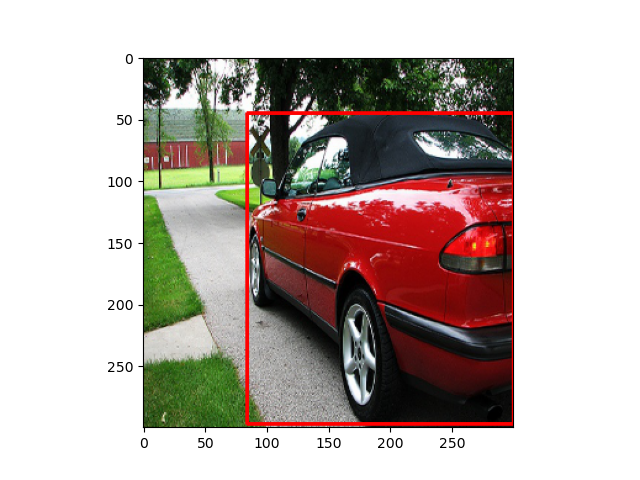

[[ 31 149 100 299]]
(31, 149) (100, 299)


<IPython.core.display.Javascript object>


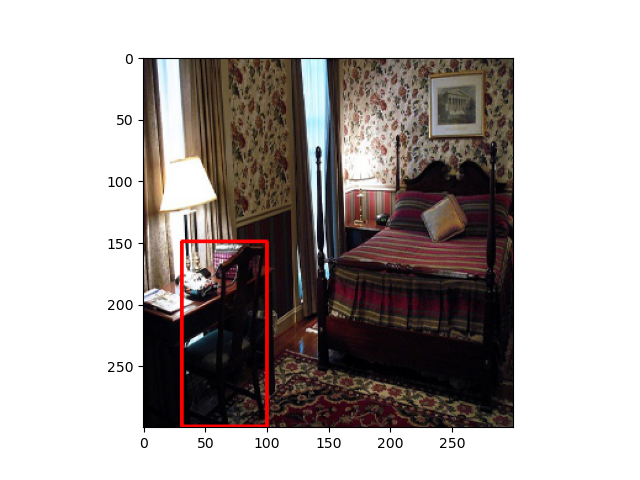

[[ 65  57 193 142]]
(65, 57) (193, 142)


<IPython.core.display.Javascript object>


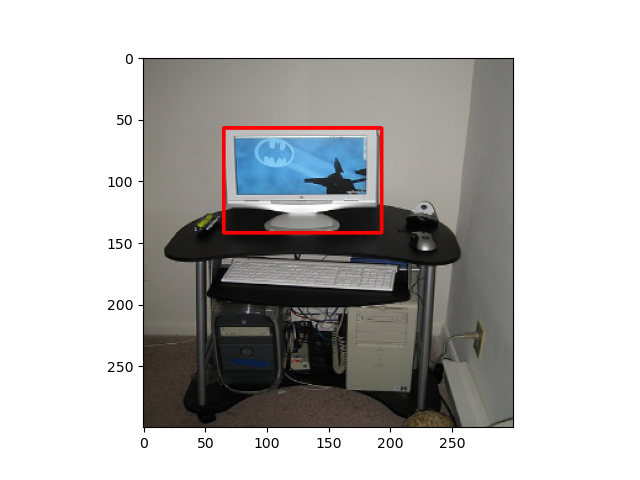

[[  8  58 300 205]]
(8, 58) (300, 205)


<IPython.core.display.Javascript object>


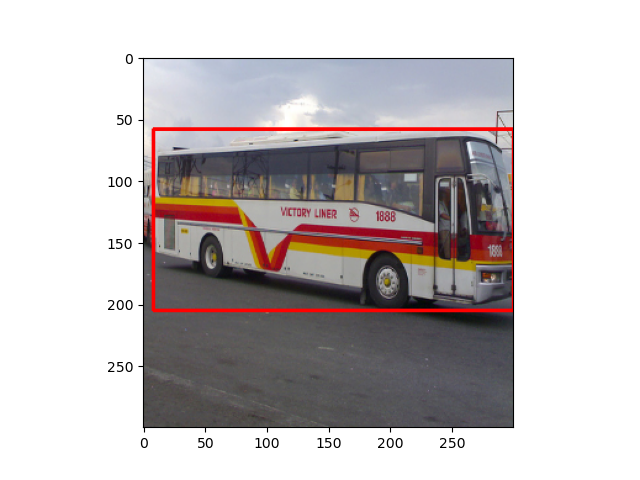

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2

indices = [1, 100, 150, 10000]

for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

[[113 165 125 187]]
(113, 165) (125, 187)


<IPython.core.display.Javascript object>


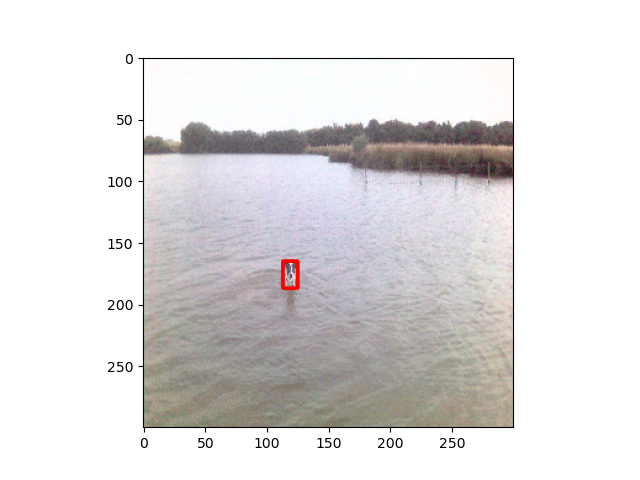

[[ 33   0 300 299]
 [  0 187  93 300]]
(33, 0) (300, 299)
(0, 187) (93, 300)


<IPython.core.display.Javascript object>


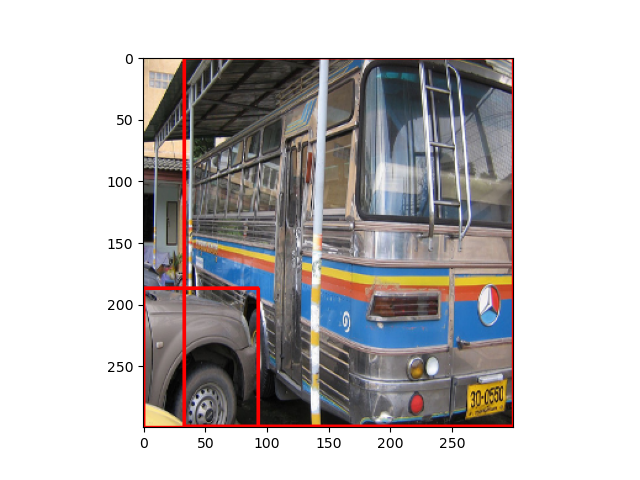

[[ 61 101 178 300]
 [140 115 199 256]
 [172  34 211 153]
 [178   0 233 105]
 [208   2 232  95]]
(61, 101) (178, 300)
(140, 115) (199, 256)
(172, 34) (211, 153)
(178, 0) (233, 105)
(208, 2) (232, 95)


<IPython.core.display.Javascript object>


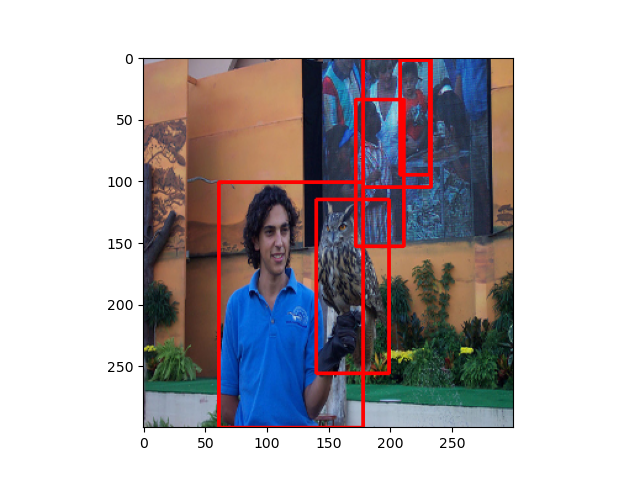

[[136 171 266 300]
 [  0 114 115 300]
 [  1  39 103 299]
 [ 90  66 130 289]
 [121 119 153 245]
 [125 103 198 300]
 [145 198 213 300]
 [192  73 245 250]
 [230  70 287 278]
 [145  62 177 154]
 [ 90  57 109 115]]
(136, 171) (266, 300)
(0, 114) (115, 300)
(1, 39) (103, 299)
(90, 66) (130, 289)
(121, 119) (153, 245)
(125, 103) (198, 300)
(145, 198) (213, 300)
(192, 73) (245, 250)
(230, 70) (287, 278)
(145, 62) (177, 154)
(90, 57) (109, 115)


<IPython.core.display.Javascript object>


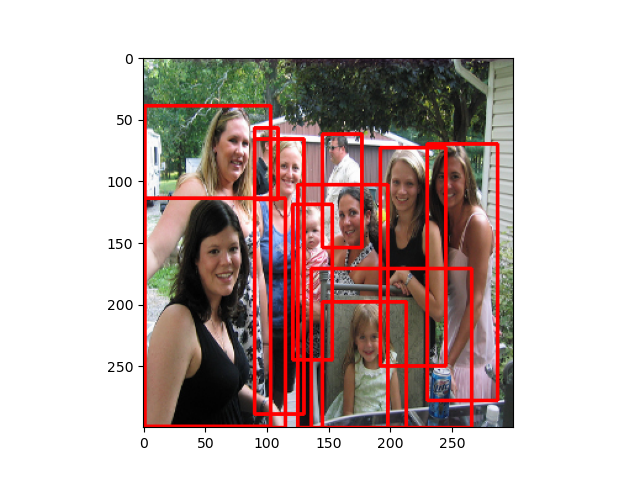

In [5]:
indices = [20000, 20001, 20002, 20003]

for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)